# Casos de Estudio

Estos son casos de estudio de negocio generados por ChatGPT para preparar entrevistas

## Caso 1

### Generación del dataset por parte de ChatGPT

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Generar fechas
start_date = datetime(2020, 1, 1)
end_date = datetime(2022, 12, 31)
date_range = pd.date_range(start_date, end_date, freq='D')

# Generar datos
np.random.seed(42)
random.seed(42)

# Crear listas para cada columna
dates = []
categories = []
prices = []
quantities = []
advertising_spend = []

categories_list = ['Electronics', 'Clothing', 'Home', 'Beauty', 'Sports']

for date in date_range:
    for _ in range(10):  # Suponiendo que tenemos 10 productos diferentes por día
        dates.append(date)
        category = random.choice(categories_list)
        categories.append(category)
        price = round(random.uniform(10, 1000), 2)
        prices.append(price)
        quantity = random.randint(1, 20)
        quantities.append(quantity)
        ad_spend = round(random.uniform(100, 2000), 2)
        advertising_spend.append(ad_spend)

# Crear DataFrame
data = {
    'Date': dates,
    'Category': categories,
    'Price': prices,
    'Quantity_Sold': quantities,
    'Advertising_Spend': advertising_spend
}

df = pd.DataFrame(data)

# Guardar en un archivo CSV
df.to_csv('ecommerce_sales.csv', index=False)
print("Dataset generado y guardado como 'ecommerce_sales.csv'.")


Dataset generado y guardado como 'ecommerce_sales.csv'.


In [6]:
!ls

ecommerce_sales.csv  sample_data


### Descripción del caso de negocio

#### Problema de Negocio:
La empresa desea predecir las ventas futuras de sus productos para optimizar su inventario y planificación de publicidad.

#### Objetivos:

*   Analizar el comportamiento de las ventas a lo largo del tiempo.
*   Identificar las categorías de productos con mejores y peores desempeños.
*   Evaluar el impacto del gasto en publicidad sobre las ventas.
*   Predecir las ventas futuras basándose en los datos históricos.

### Análisis del problema

#### Carga del dataset

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
df = pd.read_csv('ecommerce_sales.csv')
df.head()

,Date,Category,Price,Quantity_Sold,Advertising_Spend
0,2020-01-01,Electronics,34.76,9,565.29
1,2020-01-01,Clothing,739.11,18,265.18
2,2020-01-01,Beauty,41.46,3,515.41
3,2020-01-01,Sports,606.00,18,477.79
4,2020-01-01,Sports,425.32,15,1219.60


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10960 entries, 0 to 10959
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10960 non-null  object 
 1   Category           10960 non-null  object 
 2   Price              10960 non-null  float64
 3   Quantity_Sold      10960 non-null  int64  
 4   Advertising_Spend  10960 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 428.2+ KB


In [10]:
df.describe()

,Price,Quantity_Sold,Advertising_Spend
count,10960.000000,10960.000000,10960.000000
mean,502.657078,10.544161,1051.366103
std,285.860726,5.811064,545.390072
min,10.170000,1.000000,100.100000
25%,254.572500,5.000000,585.100000
50%,498.105000,11.000000,1044.655000
75%,754.015000,16.000000,1528.405000
max,999.650000,20.000000,1999.660000


In [11]:
print(df.isnull().sum())

Date                 0
Category             0
Price                0
Quantity_Sold        0
Advertising_Spend    0
dtype: int64


In [12]:
print(df.duplicated().sum())

0


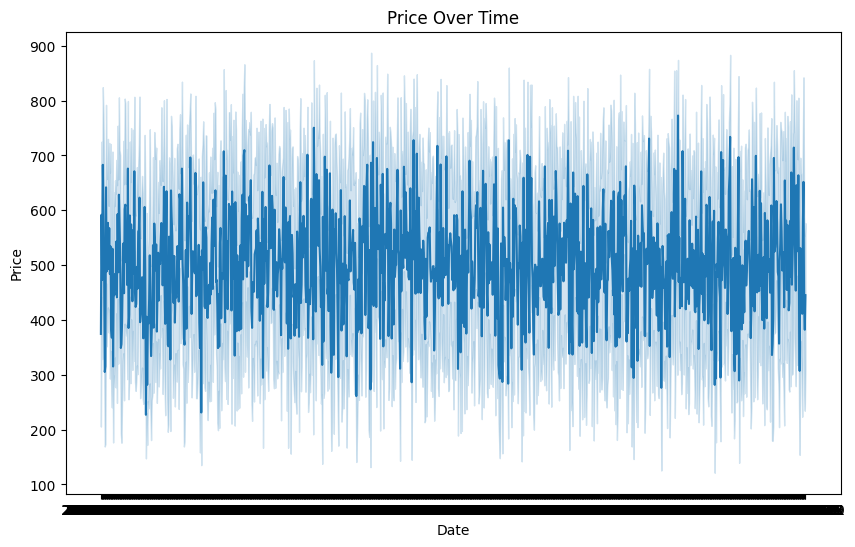

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Price', data=df)
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

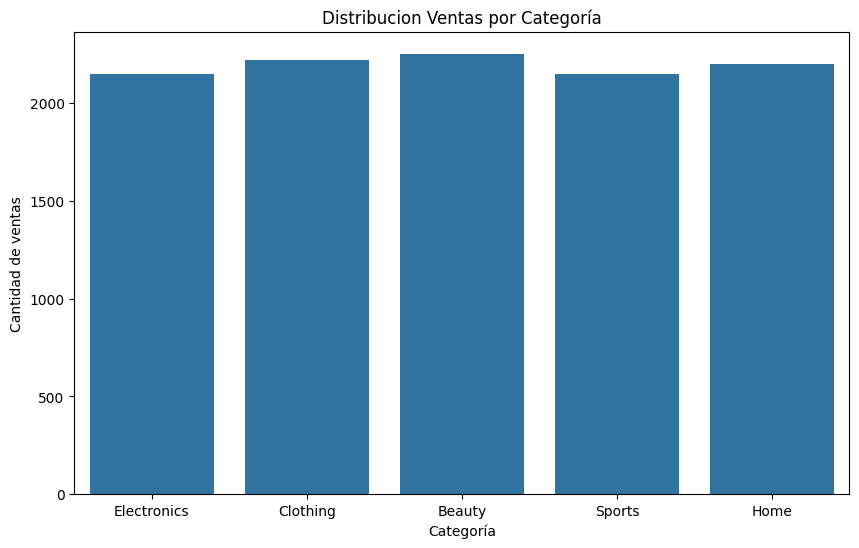

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df)
plt.title('Distribucion Ventas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de ventas')
plt.show()

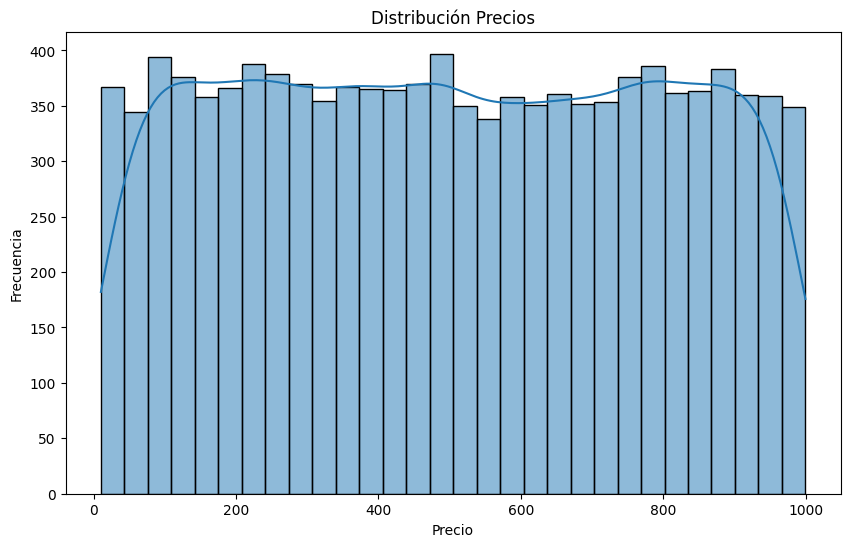

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribución Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

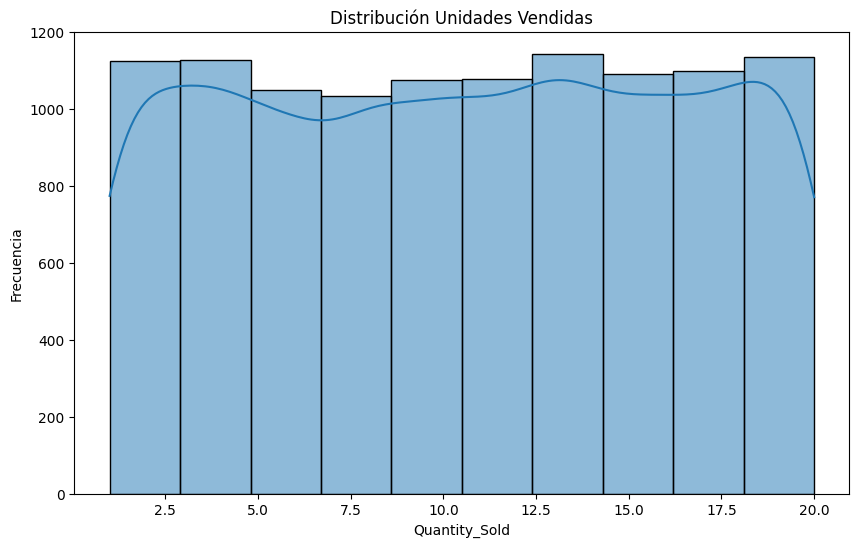

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Quantity_Sold"], bins=10, kde=True)
plt.title('Distribución Unidades Vendidas')
plt.xlabel('Quantity_Sold')
plt.ylabel('Frecuencia')
plt.show()

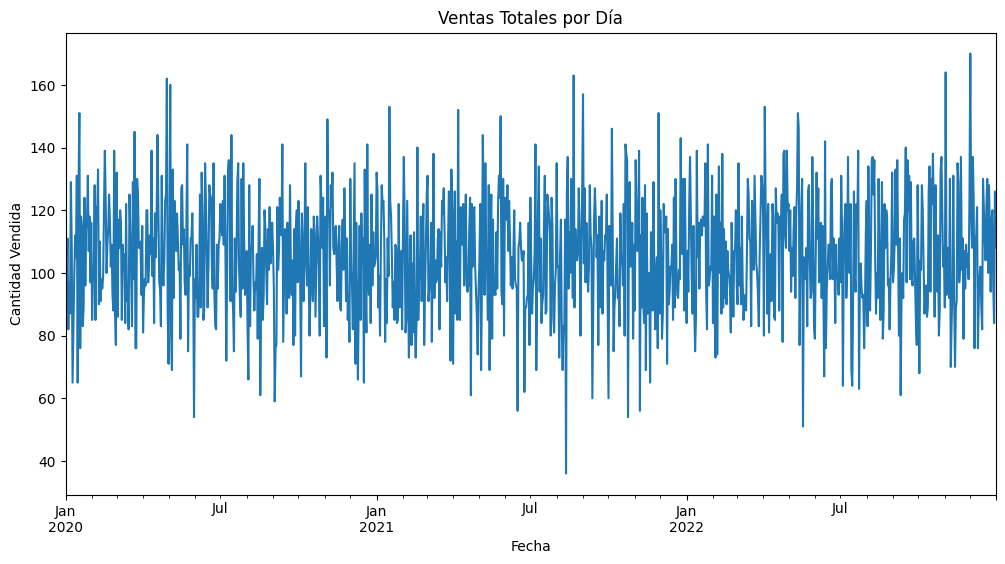

In [24]:
# Convertir la columna de fecha a datetime
df['Date'] = pd.to_datetime(df['Date'])

# Ventas totales por día
daily_sales = df.groupby('Date').sum()['Quantity_Sold']

plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title('Ventas Totales por Día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.show()


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

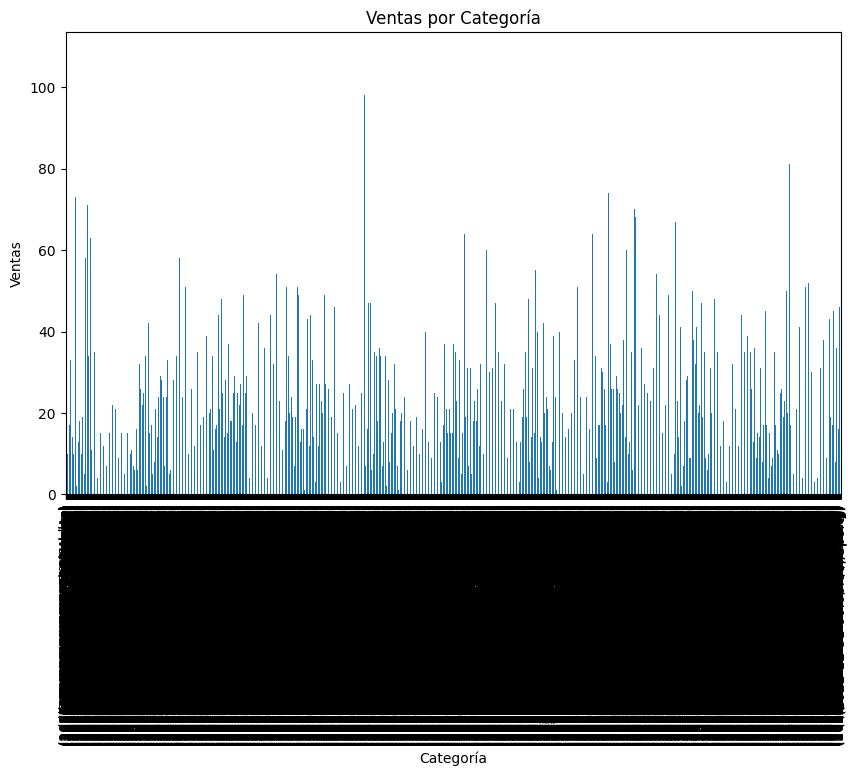

In [29]:
#df.set_index("Date", inplace=False)
sales_by_category = df.groupby([df.index, "Category"]).sum()["Quantity_Sold"].unstack()

plt.figure(figsize=(10, 6))
sales_by_category.plot()
plt.title("Ventas por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Ventas")
plt

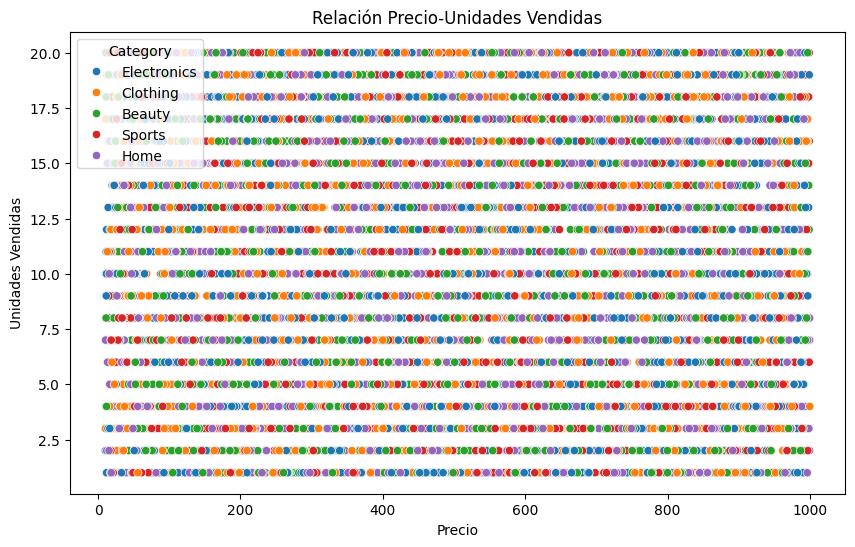

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Quantity_Sold', hue="Category", data=df)
plt.title('Relación Precio-Unidades Vendidas')
plt.xlabel('Precio')
plt.ylabel('Unidades Vendidas')
plt.show()

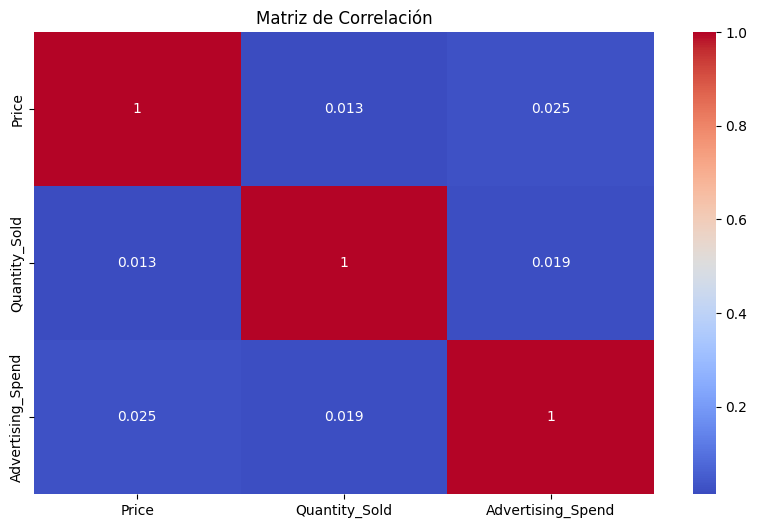

In [38]:
# Matriz de correlación
correlation_matrix = df[["Price", "Quantity_Sold", "Advertising_Spend"]].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


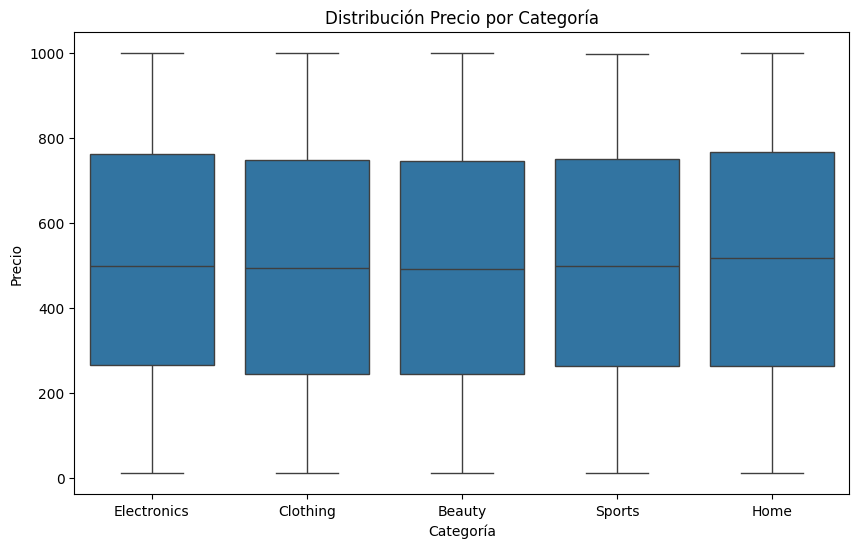

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Price', data=df)
plt.title('Distribución Precio por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Precio')
plt.show()

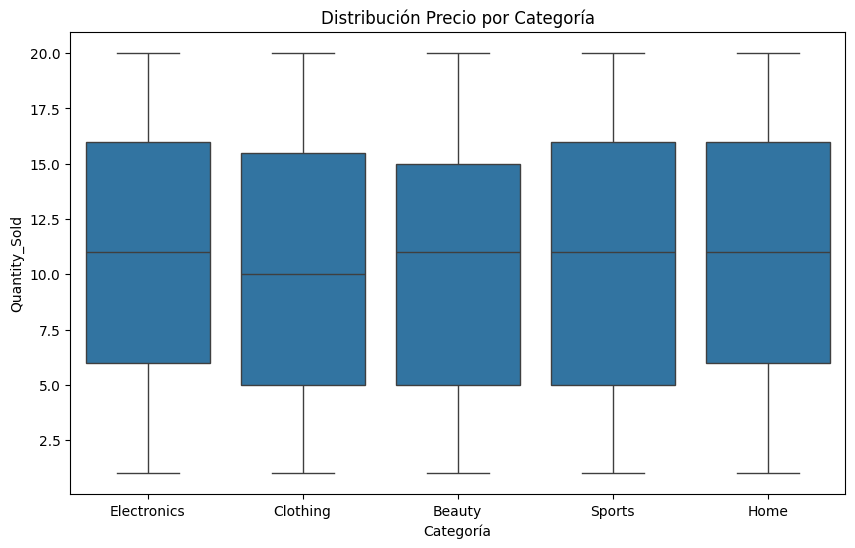

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Quantity_Sold', data=df)
plt.title('Distribución Precio por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Quantity_Sold')
plt.show()

## Caso 2

## Generación del dataset

In [43]:
!pip install Faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.7 MB/s eta 0:00:00


In [44]:
import pandas as pd
import numpy as np
from faker import Faker
import random

# Inicializar Faker y establecer una semilla para la reproducibilidad
faker = Faker()
random.seed(42)
np.random.seed(42)

# Número de registros
n = 10000

# Generar datos
data = {
    'user_id': [faker.uuid4() for _ in range(n)],
    'signup_date': [faker.date_between(start_date='-2y', end_date='today') for _ in range(n)],
    'last_login_date': [faker.date_between(start_date='-1y', end_date='today') for _ in range(n)],
    'subscription_plan': [random.choice(['Basic', 'Standard', 'Premium']) for _ in range(n)],
    'monthly_usage_hours': np.random.poisson(lam=30, size=n),
    'avg_watch_time_per_session': np.random.uniform(0.5, 3, n),
    'num_of_sessions': np.random.poisson(lam=10, size=n),
    'customer_support_calls': np.random.poisson(lam=1, size=n),
    'churned': np.random.choice([0, 1], size=n, p=[0.85, 0.15])  # Asumiendo una tasa de churn del 15%
}

df = pd.DataFrame(data)

# Guardar el dataframe en un archivo CSV
df.to_csv('streaming_service_data.csv', index=False)


## Descripción del caso de negocio

**Caso de Estudio: Análisis de Datos de una Empresa de Suscripciones de Streaming**

**Contexto:**

Una empresa de suscripciones de streaming de video está interesada en entender mejor el comportamiento de sus usuarios y predecir la tasa de cancelación de suscripciones (churn). Te proporcionan un dataset que incluye información sobre los usuarios, sus patrones de uso y si han cancelado su suscripción.


**Objetivos del Análisis:**

1. Explorar y limpiar el dataset.
2.  Realizar un análisis exploratorio de datos (EDA) para identificar patrones y relaciones importantes.
3. Crear características adicionales que puedan ayudar a predecir la cancelación de suscripciones.
4. Construir y evaluar un modelo predictivo para identificar usuarios que probablemente cancelen su suscripción.
5. Proporcionar recomendaciones basadas en los hallazgos del análisis.

## Análisis del problema

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
!ls

ecommerce_sales.csv  sample_data  streaming_service_data.csv


In [48]:
df = pd.read_csv("streaming_service_data.csv")
df.head()

,user_id,signup_date,last_login_date,subscription_plan,monthly_usage_hours,avg_watch_time_per_session,num_of_sessions,customer_support_calls,churned
0,11a136b3-72d0-434c-bc6a-7a1528dd94e8,2024-06-18,2023-10-14,Premium,28,2.579303,13,0,0
1,a05253f7-a143-4569-84ba-c3c02a061d34,2023-08-08,2024-03-19,Basic,34,1.028766,7,2,0
2,f28bfc72-5670-4a2c-8e49-37cccd0bae92,2024-03-21,2024-01-14,Basic,23,2.100548,8,0,0
3,cb5ae239-6b1f-4594-a47f-361ef3ff0966,2023-02-22,2024-06-09,Premium,32,0.600602,7,0,1
4,8928a4bc-bc82-45b8-bcf0-195424c1e431,2022-10-05,2023-07-11,Standard,36,0.672352,6,2,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     10000 non-null  object 
 1   signup_date                 10000 non-null  object 
 2   last_login_date             10000 non-null  object 
 3   subscription_plan           10000 non-null  object 
 4   monthly_usage_hours         10000 non-null  int64  
 5   avg_watch_time_per_session  10000 non-null  float64
 6   num_of_sessions             10000 non-null  int64  
 7   customer_support_calls      10000 non-null  int64  
 8   churned                     10000 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 703.2+ KB


In [50]:
df.describe()

,monthly_usage_hours,avg_watch_time_per_session,num_of_sessions,customer_support_calls,churned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,30.040000,1.739108,9.994500,1.006100,0.155300
std,5.477883,0.717459,3.162858,0.996977,0.362209
min,12.000000,0.500014,1.000000,0.000000,0.000000
25%,26.000000,1.115201,8.000000,0.000000,0.000000
50%,30.000000,1.742149,10.000000,1.000000,0.000000
75%,34.000000,2.348925,12.000000,2.000000,0.000000
max,51.000000,2.999473,25.000000,7.000000,1.000000


In [51]:
df.isnull().sum()

user_id                       0
signup_date                   0
last_login_date               0
subscription_plan             0
monthly_usage_hours           0
avg_watch_time_per_session    0
num_of_sessions               0
customer_support_calls        0
churned                       0
dtype: int64

In [54]:
df.duplicated().sum()

0

In [58]:
df[["user_id","churned"]].groupby("churned").count()

,user_id
churned,
0,8447
1,1553


In [61]:
df[["user_id","churned", "subscription_plan"]].groupby(["churned", "subscription_plan"]).count()

user_id
churned subscription_plan         
0       Basic                 2746
        Premium               2904
        Standard              2797
1       Basic                  501
        Premium                515
        Standard               537

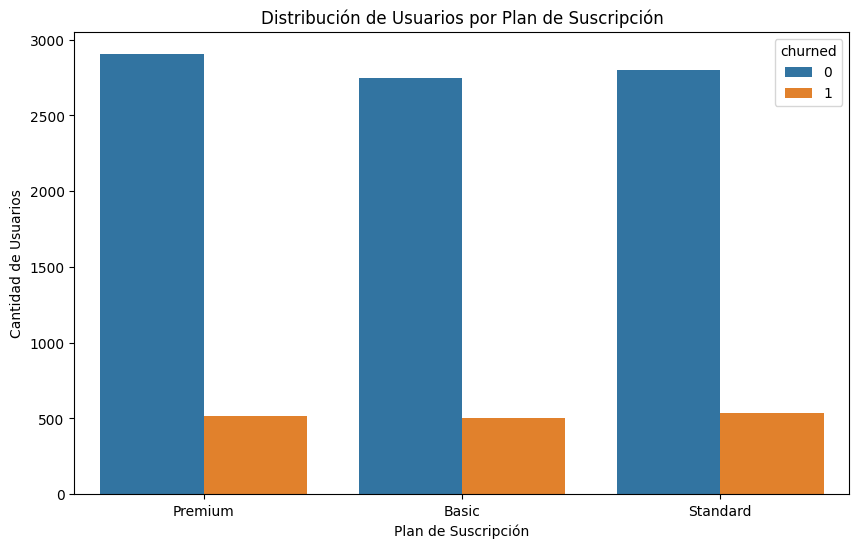

In [76]:
# Distribución por plan de suscripción
plt.figure(figsize=(10, 6))
sns.countplot(x='subscription_plan', hue="churned", data=df)
plt.title('Distribución de Usuarios por Plan de Suscripción')
plt.xlabel('Plan de Suscripción')
plt.ylabel('Cantidad de Usuarios')
plt.show()


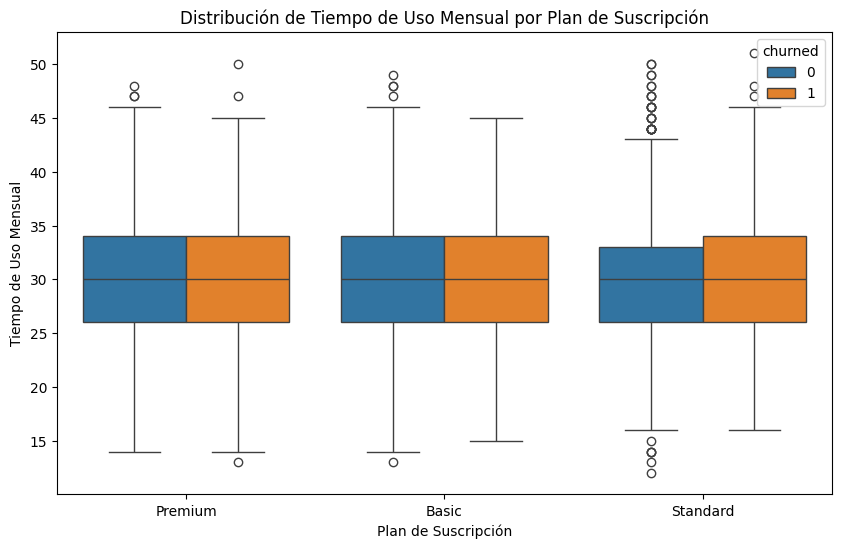

In [80]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="subscription_plan", y="monthly_usage_hours", hue="churned", data=df)
plt.title('Distribución de Tiempo de Uso Mensual por Plan de Suscripción')
plt.xlabel('Plan de Suscripción')
plt.ylabel('Tiempo de Uso Mensual')
plt.show()

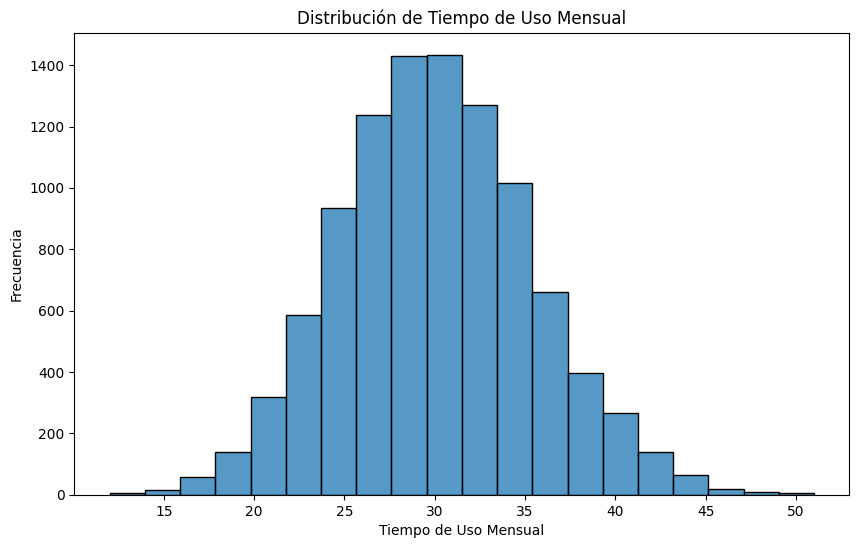

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(x="monthly_usage_hours", bins=20, data=df)
plt.title('Distribución de Tiempo de Uso Mensual')
plt.xlabel('Tiempo de Uso Mensual')
plt.ylabel('Frecuencia')
plt.show()

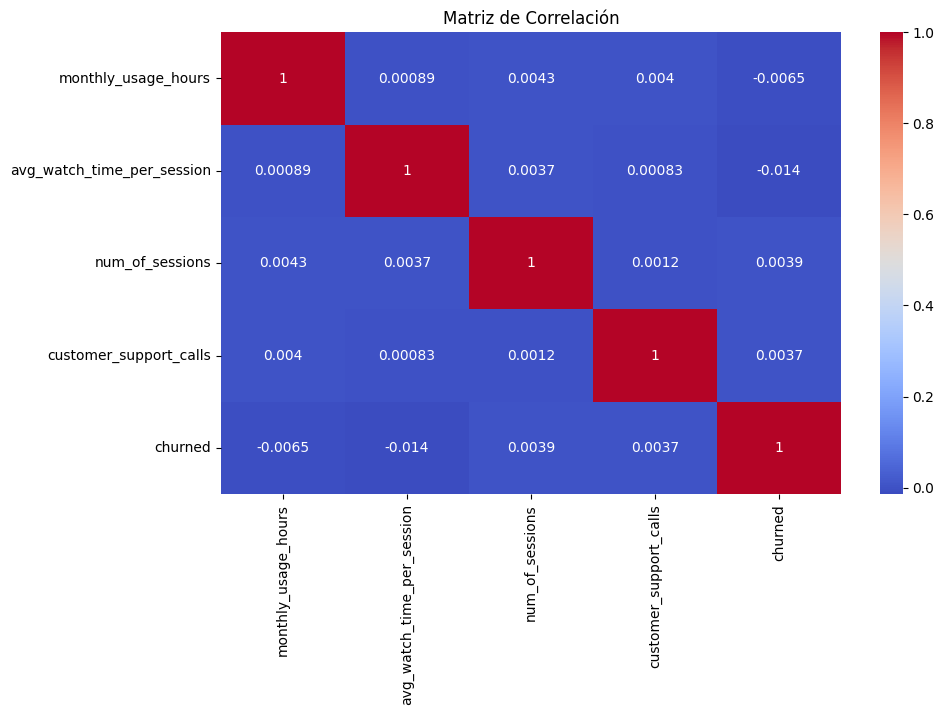

In [86]:
# Matriz de correlación
correlation_matrix = df[["monthly_usage_hours",	"avg_watch_time_per_session",	"num_of_sessions",	"customer_support_calls",	"churned"]].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [89]:
df[["churned","customer_support_calls"]].groupby("churned").mean("customer_support_calls")

,customer_support_calls
churned,
0,1.004499
1,1.014810


Feature Engineer

In [91]:
# Tiempo desde el último inicio de sesión
df['last_login_days'] = (pd.to_datetime('today') - pd.to_datetime(df['last_login_date'])).dt.days

# Tiempo desde la fecha de registro
df['signup_days'] = (pd.to_datetime('today') - pd.to_datetime(df['signup_date'])).dt.days

# Echar un vistazo a las nuevas columnas
print(df.head())


                                user_id signup_date last_login_date  \
0  11a136b3-72d0-434c-bc6a-7a1528dd94e8  2024-06-18      2023-10-14   
1  a05253f7-a143-4569-84ba-c3c02a061d34  2023-08-08      2024-03-19   
2  f28bfc72-5670-4a2c-8e49-37cccd0bae92  2024-03-21      2024-01-14   
3  cb5ae239-6b1f-4594-a47f-361ef3ff0966  2023-02-22      2024-06-09   
4  8928a4bc-bc82-45b8-bcf0-195424c1e431  2022-10-05      2023-07-11   

  subscription_plan  monthly_usage_hours  avg_watch_time_per_session  \
0           Premium                   28                    2.579303   
1             Basic                   34                    1.028766   
2             Basic                   23                    2.100548   
3           Premium                   32                    0.600602   
4          Standard                   36                    0.672352   

   num_of_sessions  customer_support_calls  churned  last_login_days  \
0               13                       0        0              259

Modelado Predictivo

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convertir variables categóricas en dummies
df = pd.get_dummies(df, columns=['subscription_plan'], drop_first=True)

# Seleccionar características y objetivo
X = df.drop(['user_id', 'signup_date', 'last_login_date', 'churned'], axis=1)
y = df['churned']

# Escalado de características numéricas
scaler = StandardScaler()
X[['monthly_usage_hours', 'avg_watch_time_per_session', 'num_of_sessions', 'customer_support_calls', 'last_login_days', 'signup_days']] = scaler.fit_transform(
    X[['monthly_usage_hours', 'avg_watch_time_per_session', 'num_of_sessions', 'customer_support_calls', 'last_login_days', 'signup_days']])

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


# Entrenar modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [98]:
# Configurar la búsqueda de hiperparámetros con validación cruzada

# Definir los parámetros para la búsqueda
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Ejecutar la búsqueda
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores parámetros: {best_params}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores parámetros: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [99]:
# Entrenar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = best_model.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1696
           1       0.33      0.00      0.01       304

    accuracy                           0.85      2000
   macro avg       0.59      0.50      0.46      2000
weighted avg       0.77      0.85      0.78      2000

[[1694    2]
 [ 303    1]]


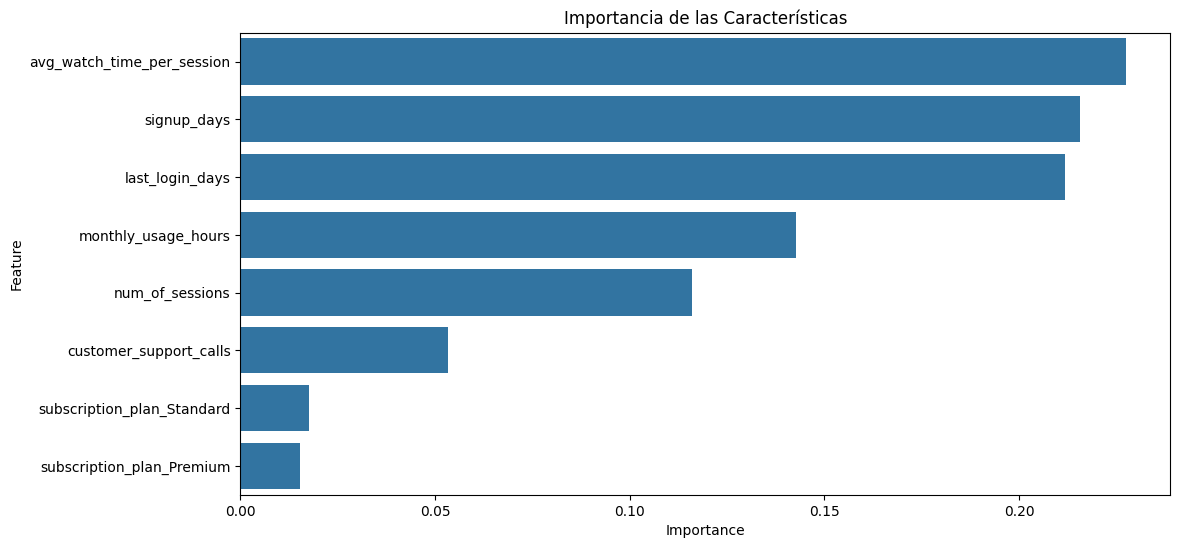

In [94]:
# Importancia de las características
importances = model.feature_importances_
features = X.columns

# Mostrar la importancia de las características
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importancia de las Características')
plt.show()


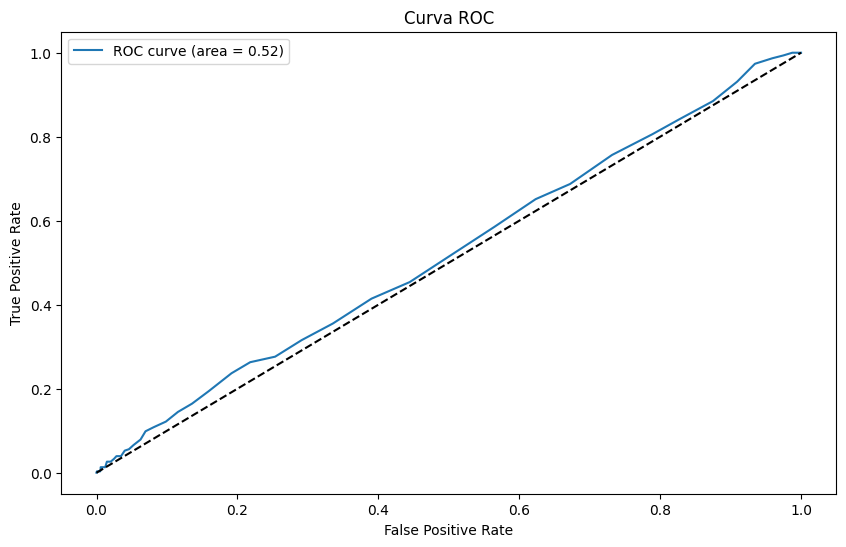

In [96]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Calcular probabilidades
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()
